In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

In [41]:
# speech list를 한 줄로만 로드했다.
speech_list = os.listdir('./data/ch10/Speeches')
# 일단 파일을 하나씩 불러와서 한줄만 추출하는 리스트를 만들자.
content = []
for title in speech_list :
    f = open(f'./data/ch10/Speeches/{title}','r', encoding='utf-8')
    f_content = f.readlines()
    f.close()
    content.append(f_content[0])


### dataframe은 list를 합칠 때 아래로 합치는게 아니라 옆으로 합친다. 그러다보니 column 단위로 묶인 list를 dataframe으로 만들기 위해서는 추가적인 절차가 필요하다. 

# 첫번째 방법 : 행열을 바꾸는 방법이다. 간단하고 직관적이다.
speech_total = pd.DataFrame([speech_list,content]).T
speech_total.head(1)

# 두번째 방법 : 리스트를 zip() 매소드를 이용해 묶는 방법이다. 새로운 방법을 배운다는데 의의가 있다.
speech_total = pd.DataFrame(list(zip(speech_list,content)), columns=['title','contents'])
speech_total.head(1)

,title,contents
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...


### Apply 함수 적용하기
Apply 매소드는 Argument가 필요한 함수나 메서드에 따로 값을 넣지 않아도 자동으로 적용시킬 수 있도록 도와줍니다.

데이터프레임에서 column 이나 Dataframe 전체에 적용 가능하다. 

A로 정의되는 ㄱ매소드를 새로 만들었다고 생각해보자.
그리고 A를 실행하기 위해서는 B라는 Argument가 필요하다. 
만약 우리가 함수를 연속으로 적용시키고 싶다면 B를 리스트로 만든 뒤 for 문을 활용해서 반복적으로 돌릴 것이다. 

도식화하자면 
1. 함수를 만들고 
2. 적용할 대상을 자동으로 실행시키기 위해 Loop을 만들고
3. 원하는 대상에 적용시키는 과정

Apply는 이러한 반복작업을 줄여주는 매소드라고 이해하면 쉽다. Apply() 하나면 세번의 절차를 한번으로 쉽게 줄여줄 수 있다.

In [42]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'
,'Oct','Sep','Nov','Dec']

def city_extraction(v) :
    for mon in Months :
        if mon in v :
            return v[:v.find(mon)]
            
speech_total['city'] = speech_total.title.apply(city_extraction)



### pandas로 Datetime 건드리기
데이터 분석을 할 때 시계열 자료를 다루는 일은 매우 흔하다. Dataframe은 날짜 및 시간을 다루기 위한 매소드가 풍부하게 많다. 

우리가 시계열을 다뤄야할 일이 많으므로 이와 관련한 메소드를 배워두는 건 큰 도움이 된다.

[이 사이트](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)는 파이썬 공식 사이트인데 시계열과 관련된 fortmat을 설명하는 페이지이다.

여기서 설명하는 format은 파이썬에만 통용되는 것이 아니라 모든 프로그래밍 언어에서 활용된다. 나중에 다른 프로그래밍 언어에서도 시계열 데이터를 다룰 때 도움되니 자주 보고 익혀두자.


In [43]:
def date_extraction(r) :
    return r.title[len(r.city):r.title.find('.txt')]

speech_total['date'] = speech_total.apply(date_extraction, axis=1)

# format은 현재 데이터 양식이 어떤 패턴인지를 pandas에게 설명하는 kwargs이다.
speech_total.date = pd.to_datetime(speech_total.date, format = '%b%d_%Y')

In [45]:
def extractDMY(r) :
    r['day'] = r.date.day
    r['month'] = r.date.month
    r['year'] = r.date.year
    return r

# apply를 dataframe에 적용하는 방법과 iterrow로 dataframe에 적용하는 방법은 결과가 동일하다.
speech_total = speech_total.apply(extractDMY, axis = 1 )
speech_total.drop(columns=['title'], inplace=True)

In [66]:
words = ['vote','tax','campaign','economy']

def findwordratio(row) :
    total_n_words = len(row.contents.split(' '))
    for w in words :
        row['r_{}'.format(w)] = row.contents.count(w)/total_n_words
    return row
### apply는 row를 하나씩 불러와서 적용하는 방법이다. 
speech_total = speech_total.apply(findwordratio,axis=1)
speech_total.head(1)

,contents,city,date,day,month,year,r_vote,r_tax,r_campaign,r_economy,Y_M
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.000224,0.000617,2019_Dec


In [65]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'
,'Oct','Sep','Nov','Dec']

lambda_func = lambda r: '{}_{}'.format(r.year,Months[r.month-1])
speech_total['Y_M'] = speech_total.apply(lambda_func, axis=1) 

### .pivot_table( index = 불러올 column, values = 불러올 column, aggfunc = 구현하고자 하는 기능)

### aggfuction은 groupby 뒤에 붙는 mean(), size()와 같은 기능을 수행함.

In [53]:
Words = ['vote','tax','campaign','economy']

vis_df = speech_total.pivot_table( index =['Y_M'], values=['r_{}'.format(w) for w in words], aggfunc=np.mean)

vis_df

,r_campaign,r_economy,r_tax,r_vote
Y_M,,,,
2019_Aug,0.001499,0.000270,0.000872,0.001596
2019_Dec,0.000316,0.000665,0.000558,0.000739
2019_Jul,0.000283,0.000660,0.000660,0.001603
2019_Nov,0.000551,0.000333,0.000385,0.002048
2019_Oct,0.000533,0.000572,0.001340,0.001398
2019_Sep,0.000843,0.000448,0.000419,0.000409
2020_Aug,0.000428,0.000222,0.001189,0.001577
2020_Feb,0.000353,0.000224,0.000625,0.001206
2020_Jan,0.000299,0.000240,0.001331,0.001215


### Groupby는 원하는 column의 class별로 데이터를 종합해줌. Row가 많더라도 class가 적으면 그만큼 row size도 작다.

* groupby와 pivot 기능은 둘 다 같은 instance를 하나로 묶는다는 점에서 유사하다. 하지만 groupby는 column을 선택해서 정렬하기가 어려운 반면 애초에 pivot은 원하는 column만 보여주도록 설계되었다.

### 보여주고자 하는 방법이 복잡하면 그만큼 구현하기 까다롭다.
원하는 차트를 그리기 위해서는 무엇을 그리고 싶은지, 그리고 어떻게 그려야하는지 알아야한다. 응용이야 필요하지만 기본적으로 구현하고자 하는 기능을 만드는 방법을 외워야한다.

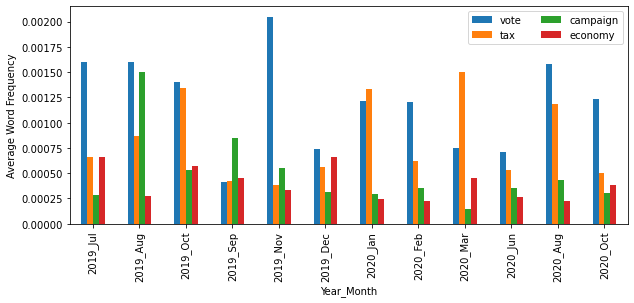

In [64]:
column_order = vis_df.sum().sort_values(ascending=False).index
row_order = speech_total.sort_values('date').Y_M.unique()
vis_df[column_order].loc[row_order].plot.bar(figsize=(10,4))
plt.legend(['vote','tax','campaign','economy'], ncol=2)
plt.xlabel('Year_Month')
plt.ylabel('Average Word Frequency')
plt. show()

In [67]:
customer_df = pd.read_csv('data/ch10/Customer Churn.csv')
customer_df.head(1)

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0


In [68]:
customer_df.columns = ['Call_Failure', 'Complains',
'Subscription_Length', 'Seconds_of_Use', 'Frequency_of_use',
'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Status',
'Churn']

In [70]:
customer_df.Churn.unique()

array([0, 1], dtype=int64)

box_plot을 하나의 plot 내에서 만들고 싶다면 Seires를 이용하자. 데이터 프레임을 만들기 위해 리스트 내 리스트를 삽입하는 것과 같이 Series 내 list를 삽입해서 연속으로 불러올 수 있게 사용하자.

Array나 List나 그게 그거다.

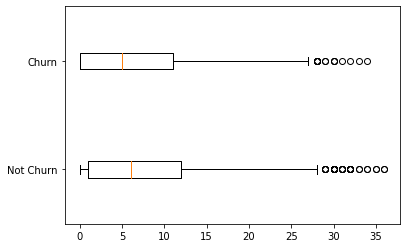

In [77]:


churn_possibilities = customer_df.Churn.unique()
box_sr = pd.Series('', index=churn_possibilities)
for poss in churn_possibilities:
    BM = customer_df.Churn == poss
    box_sr[poss] = customer_df[BM].Call_Failure.values

plt.boxplot(box_sr,vert=False) # Vertical False
plt.yticks([1,2],['Not Churn','Churn'])
plt.show()


In [78]:
BM = customer_df.Churn == 1
# box_sr[1] = customer_df[BM].Call_Failure.values

print(type(customer_df[BM].Call_Failure.values))

<class 'numpy.ndarray'>
